# Spotify

Données disponibles directement [ici](spotify_dataset.csv)

On va créer deux `DataFrames` :

| `DataFrame` | Contenu |
|:-|:-|
| `spotify`    | données d'origine |
| `spotify_qt` | avec uniquement les variables d'intérêt |
|              | et standardisé pour l'application des méthodes |

Comme il n'y a pas de données manquantes, on utilisera `spotify` pour calculer les centres des classes lorsqu'on voudra les décrire.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
spotify = pandas.read_csv("https://fxjollois.github.io/donnees/spotify_dataset.csv")
spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


In [3]:
spotify_qt = spotify[["danceability", "energy", "loudness", "speechiness", 
                      "acousticness", "instrumentalness", "liveness", "valence", 
                      "tempo", "duration_ms"]]
spotify_qt = pandas.DataFrame(scale(spotify_qt), columns = spotify_qt.columns)
spotify_qt

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.689981,0.160142,0.469661,-0.379213,0.371103,-0.508718,-0.714836,1.131746,2.279088,-0.515621
1,-0.234429,-0.295077,-0.424305,-0.455863,-1.021622,-0.156181,-0.147635,0.952193,-0.602615,-0.178724
2,0.659804,0.274936,-0.596960,-0.405925,1.421549,-0.508703,-0.477201,1.367410,-0.116718,-0.091752
3,0.282989,-0.136740,-0.345791,0.360579,1.008452,-0.427667,-0.812549,1.588111,-0.472335,-0.646968
4,-0.138819,0.734114,1.262708,0.592853,1.454007,-0.505845,0.066294,1.359929,-0.162184,0.090146
...,...,...,...,...,...,...,...,...,...,...
41094,-2.067887,-0.876966,-0.792398,-0.450057,1.539577,2.673999,0.650262,-1.894103,-1.617400,-0.706227
41095,2.082702,-0.845298,0.050356,0.245604,-0.780846,-0.508718,0.343823,0.738973,0.022291,-0.696619
41096,1.008498,0.888492,1.061998,-0.434959,-1.035785,-0.508708,-0.361564,0.233979,0.022772,-0.059810
41097,0.339230,-1.593441,-1.101181,-0.195717,1.843498,2.351114,-0.303745,0.065648,0.023838,-0.180624


In [4]:
spotify_qt.describe().round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.04,-2.29,-7.35,-0.85,-1.07,-0.51,-1.09,-2.03,-4.10,-1.85
25%,-0.67,-0.73,-0.49,-0.46,-0.96,-0.51,-0.62,-0.79,-0.75,-0.52
50%,0.07,0.08,0.18,-0.34,-0.31,-0.51,-0.40,0.06,-0.06,-0.14
75%,0.73,0.82,0.72,-0.04,0.92,-0.31,0.34,0.84,0.59,0.27
max,2.52,1.66,2.63,10.30,1.86,2.79,4.61,1.70,4.20,33.08


## Pour information

L'application de la CAH sur les 41000 lignes prend un peu plus d'une minute.

In [5]:
%%time
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(spotify_qt)

CPU times: user 1min 15s, sys: 29.3 s, total: 1min 45s
Wall time: 1min 58s


## Kmeans avec $k=100$

In [6]:
kmeans100 = KMeans(n_clusters = 100).fit(spotify_qt)

In [7]:
kmeans1 = KMeans(n_clusters = 1).fit(spotify_qt)

In [8]:
p = numpy.round(1 - kmeans100.inertia_ / kmeans1.inertia_, 4) * 100
print("Part de l'information conservée : " + str(p) + "%")

Part de l'information conservée : 78.11%


Avec la première partition en 100 classes, nous conservons une bonne partie de l'information.

Ici, nous avons besoin des centres sur les données standardisées pour faire la CAH ensuite.

In [9]:
centres = spotify_qt.assign(classe = kmeans100.labels_).groupby("classe").mean()
centres.round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
classe,,,,,,,,,,
0,-1.81,-1.61,-1.52,-0.38,1.50,2.24,-0.32,-1.64,-1.34,-0.39
1,1.45,0.60,0.65,-0.24,-0.57,-0.47,-0.62,1.21,-0.17,-0.12
2,0.46,-0.52,0.22,-0.39,0.65,-0.47,-0.43,-0.77,0.25,0.05
3,0.31,0.20,0.64,-0.34,-0.61,-0.47,-0.42,-0.71,-0.94,0.08
4,0.04,1.06,0.79,-0.20,-0.78,-0.46,0.93,0.82,0.67,-0.21
...,...,...,...,...,...,...,...,...,...,...
95,-0.13,-0.85,-0.52,-0.13,1.17,-0.42,-0.34,0.69,1.57,-0.47
96,-1.38,1.19,0.22,0.25,-0.75,1.98,3.45,-1.19,-0.04,0.13
97,-0.56,0.79,0.32,-0.22,-0.80,2.05,-0.04,0.39,-0.51,-0.59


In [10]:
corresp01 = pandas.DataFrame({"step0" : spotify_qt.index, "step1" : kmeans100.labels_})
corresp01

,step0,step1
0,0,28
1,1,79
2,2,85
3,3,85
4,4,84
...,...,...
41094,41094,0
41095,41095,61
41096,41096,31
41097,41097,68


## CAH sur les centres

In [11]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(centres)

In [12]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Sur cette base, on peut envisager envisager 5 classes.

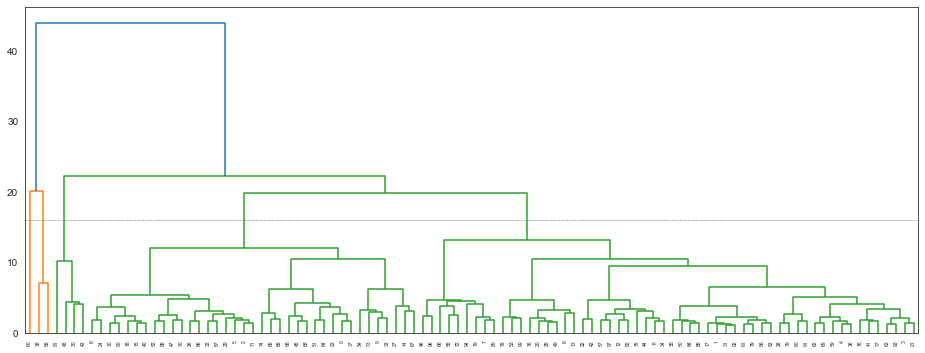

In [13]:
plt.figure(figsize = (16, 6))
plot_dendrogram(hac)
plt.axhline(y = 16, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

In [14]:
hacOK = AgglomerativeClustering(n_clusters = 5).fit(centres)

In [15]:
corresp12 = pandas.DataFrame({"step1" : centres.index, "step2" : hacOK.labels_})
corresp12

,step1,step2
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
95,95,1
96,96,0
97,97,0
98,98,1


In [35]:
corresp02 = corresp01.merge(corresp12).sort_values(by = "step0")
corresp02

,step0,step1,step2
0,0,28,0
484,1,79,0
1285,2,85,0
1286,3,85,0
2116,4,84,0
...,...,...,...
9870,41094,0,1
18924,41095,61,0
12460,41096,31,0
11214,41097,68,1


Ici aussi, on calcule les centres sur les données standardisées.

In [37]:
centres_init = spotify_qt.assign(classe = corresp02.step2).groupby("classe").mean()
centres_init.round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
classe,,,,,,,,,,
0,0.01,0.05,0.07,0.04,-0.04,0.00,0.00,-0.04,0.01,0.00
1,-0.01,-0.09,-0.14,-0.08,0.07,-0.01,0.00,0.08,-0.02,-0.00
2,-0.05,-0.01,-0.09,-0.16,-0.08,0.02,0.04,0.03,0.12,0.04
3,0.27,-0.84,-0.60,-0.18,0.45,0.78,-0.22,-0.22,-0.19,-0.01
4,0.25,0.20,0.39,0.21,-0.34,0.11,-0.14,-0.36,0.12,-0.03


## Kmeans avec donc le nombre de classes obtenu

In [38]:
kmeansOK = KMeans(n_clusters = 5, init = centres_init, n_init = 1).fit(spotify_qt)

In [39]:
p = numpy.round(1 - kmeansOK.inertia_ / kmeans1.inertia_, 4) * 100
print("Part de l'information conservée : " + str(p) + "%")

Part de l'information conservée : 38.29%


On ne garde ici au final un peu moins 40% de l'information, avec 5 classes. Ce qui est tout de même assez élevé dans un cas réel.

Pour décrire les classes, on utilise ici les données de départ.

In [40]:
spotify.assign(classe = kmeansOK.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.53,0.67,5.29,-9.37,0.69,0.17,0.35,0.09,0.64,0.56,119.86,248159.52,3.91,42.21,10.69,0.46
1,0.50,0.35,5.15,-12.53,0.76,0.05,0.67,0.04,0.17,0.46,111.80,208822.25,3.80,39.30,9.75,0.47
2,0.44,0.78,5.29,-7.01,0.69,0.08,0.10,0.18,0.19,0.42,139.58,248613.49,3.92,41.01,10.68,0.42
3,0.35,0.22,5.00,-19.56,0.62,0.05,0.80,0.73,0.15,0.24,106.72,281429.41,3.73,41.19,12.50,0.03
4,0.68,0.68,5.25,-8.29,0.68,0.07,0.21,0.06,0.15,0.74,115.44,227221.26,3.98,39.34,10.20,0.70


## Kmeans avec le même nombre de classes, mais en laissant l'initialisation par défaut

In [21]:
kmeansOKbis = KMeans(n_clusters = 5).fit(spotify_qt)

In [22]:
p = numpy.round(1 - kmeansOKbis.inertia_ / kmeans1.inertia_, 4) * 100
print("Part de l'information conservée : " + str(p) + "%")

Part de l'information conservée : 39.03%


On remarque qu'en faisant ainsi, le résultat est presque identique.

In [23]:
spotify.assign(classe = kmeansOKbis.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.49,0.35,5.15,-12.53,0.76,0.04,0.67,0.04,0.19,0.45,112.07,211034.76,3.80,39.43,9.82,0.47
1,0.68,0.63,5.49,-8.84,0.60,0.35,0.29,0.03,0.26,0.57,117.58,234868.24,3.94,40.44,10.39,0.59
2,0.43,0.80,5.26,-6.96,0.69,0.07,0.11,0.18,0.29,0.43,136.49,250735.64,3.92,41.46,10.72,0.40
3,0.35,0.23,5.01,-19.31,0.62,0.05,0.79,0.75,0.15,0.25,107.24,282883.15,3.74,41.33,12.54,0.03
4,0.67,0.68,5.24,-8.43,0.69,0.06,0.22,0.07,0.16,0.74,117.12,226804.70,3.97,39.32,10.17,0.69


## Comparaison des deux classes

In [24]:
pandas.crosstab(index = kmeansOK.labels_, columns = kmeansOKbis.labels_, 
                margins = True, margins_name = "Total",
                rownames = ["Hybride"], colnames = ["Direct"])

Direct,0,1,2,3,4,Total
Hybride,,,,,,
0,475,788,1553,48,310,3174
1,8895,100,16,55,324,9390
2,218,256,7570,64,881,8989
3,51,21,4,4141,0,4217
4,4,1096,213,1,14015,15329
Total,9643,2261,9356,4309,15530,41099


## Et si on cherchait le nombre de classes directement ?

In [25]:
%%time

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(spotify_qt)
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (spotify_qt.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

CPU times: user 1min 35s, sys: 15.5 s, total: 1min 50s
Wall time: 9.23 s


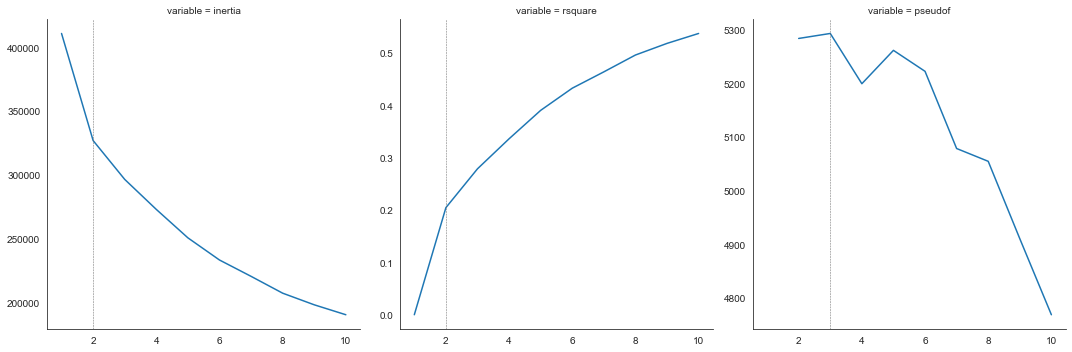

In [26]:
g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
ax1, ax2, ax3 = g.axes[0]
ax1.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax2.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax3.axvline(x = 3, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

In [27]:
kmeans3 = KMeans(n_clusters = 3, init = "random", n_init = 20).fit(spotify_qt)

In [28]:
spotify.assign(classe = kmeans3.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.44,0.77,5.27,-7.19,0.69,0.09,0.14,0.16,0.30,0.45,137.61,249858.09,3.91,41.22,10.76,0.43
1,0.41,0.26,5.10,-16.10,0.70,0.06,0.76,0.34,0.18,0.33,108.56,240049.19,3.75,40.37,10.91,0.25
2,0.66,0.64,5.25,-8.79,0.69,0.07,0.28,0.05,0.16,0.71,114.66,223475.15,3.96,39.33,10.08,0.67


## Et sur l'ACP ?

In [29]:
acp = PCA(n_components = 2).fit(spotify_qt)

In [30]:
spotify_pca_row = pandas.DataFrame(acp.transform(spotify_qt), columns = ["Dim1", "Dim2"])

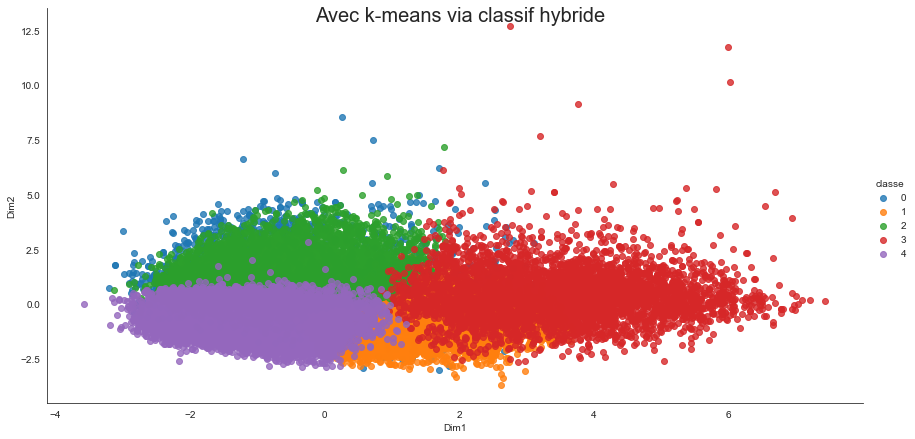

In [31]:
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe = kmeansOK.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec k-means via classif hybride", size = 20)

plt.show()

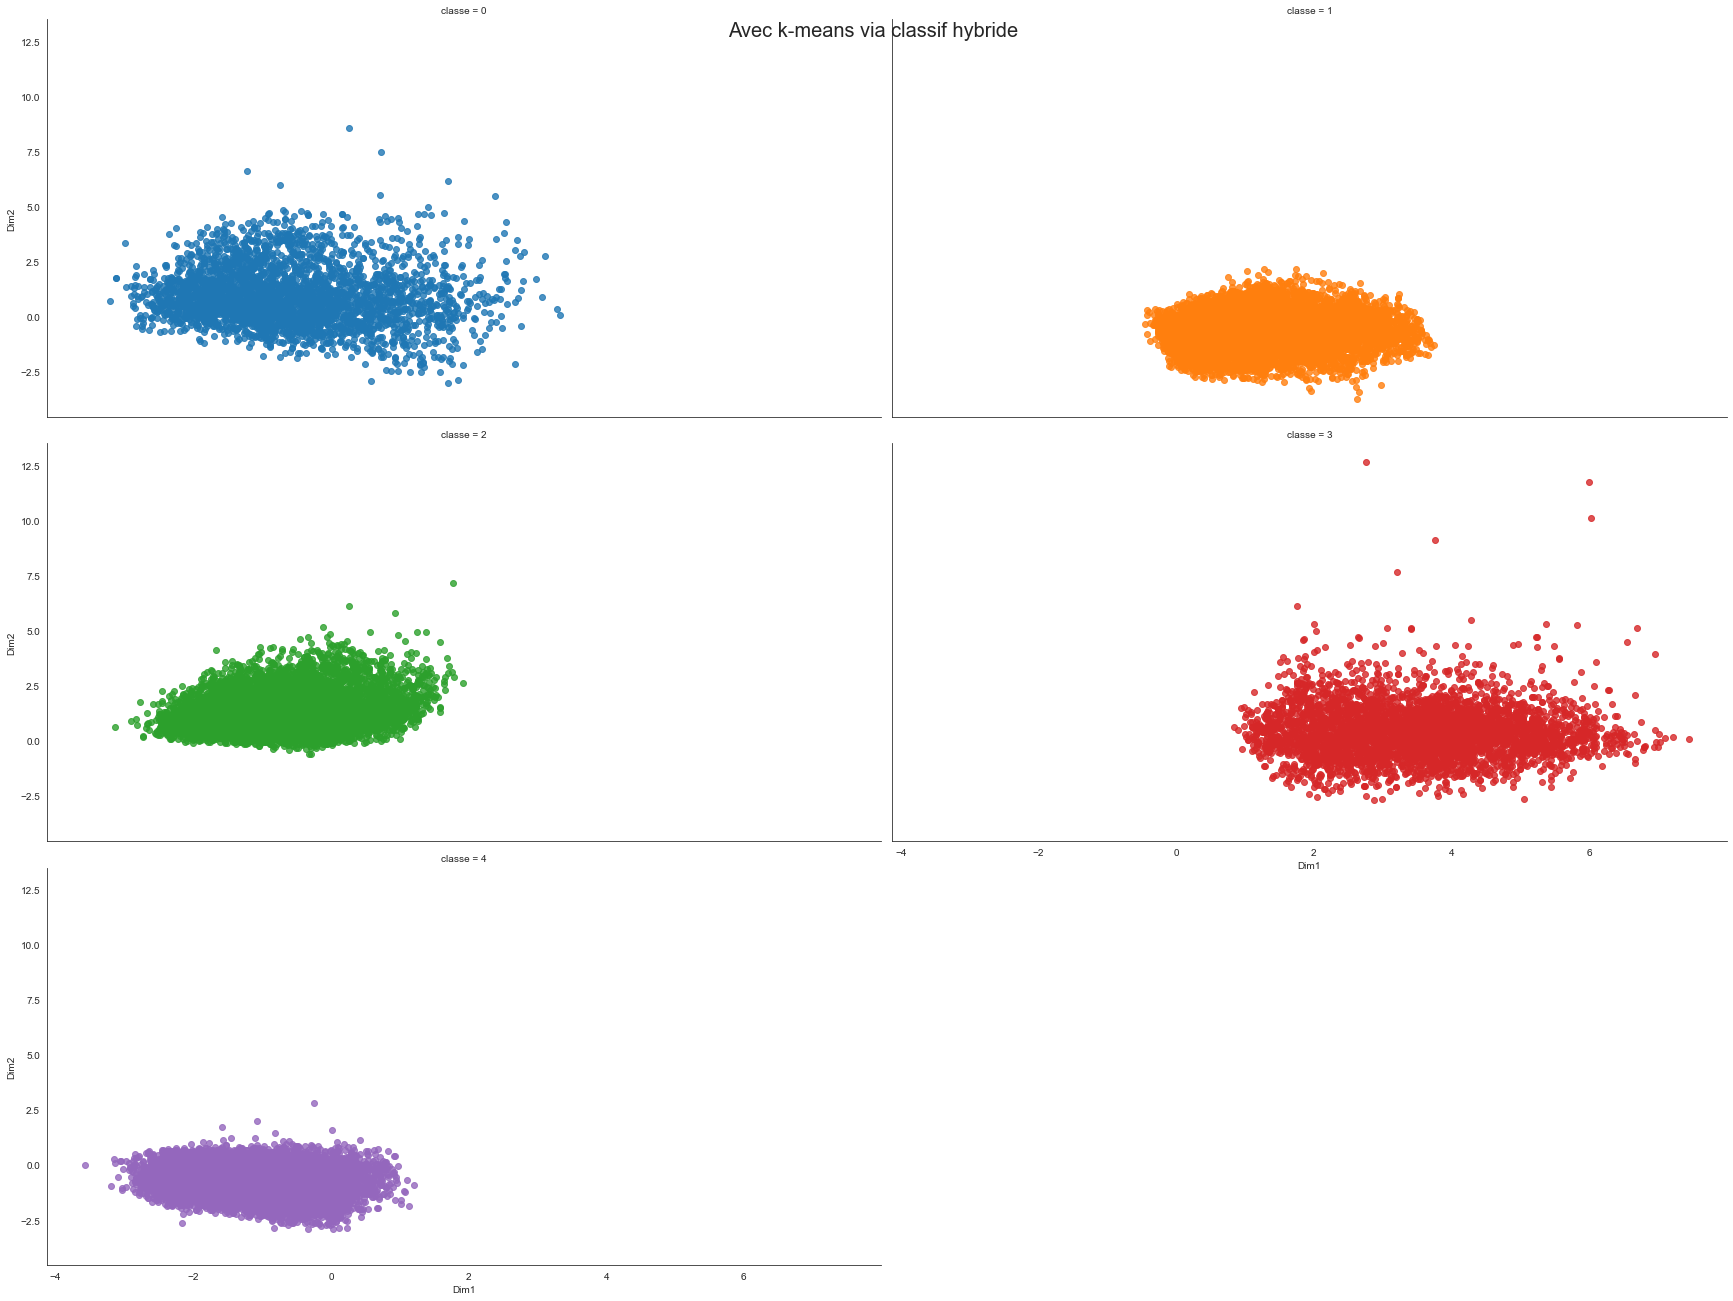

In [32]:
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe = kmeansOK.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    col = "classe", col_wrap = 2,
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec k-means via classif hybride", size = 20)

plt.show()

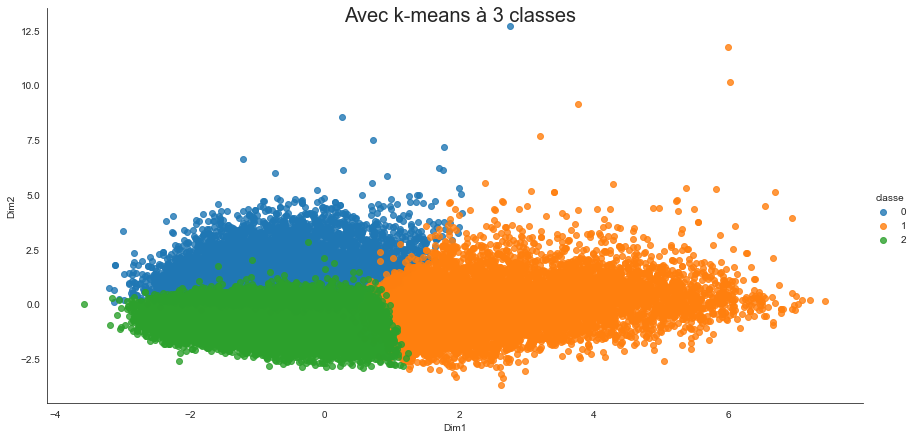

In [33]:
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe = kmeans3.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec k-means à 3 classes", size = 20)

plt.show()

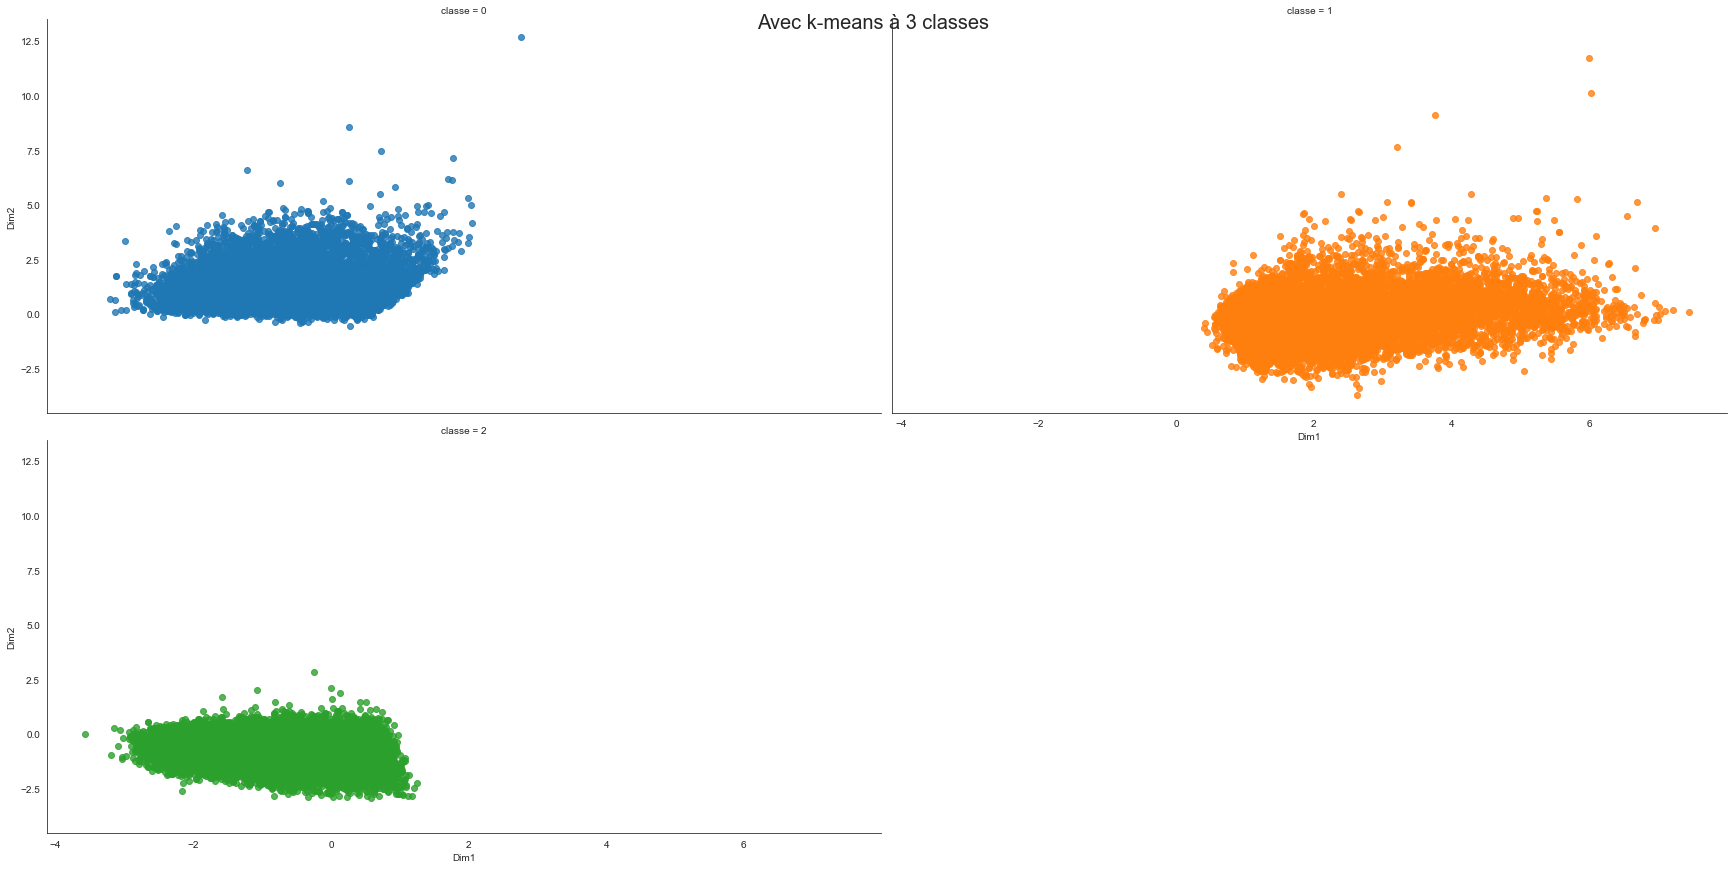

In [34]:
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe = kmeans3.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    col = "classe", col_wrap = 2,
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec k-means à 3 classes", size = 20)

plt.show()